In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\NADIR\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("USA_Housing.csv")

df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.shape

(5000, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4990 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     4995 non-null   float64
 3   Avg. Area Number of Bedrooms  4994 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4990.000000,5000.000000,4995.000000,4994.000000,5000.000000,5.000000e+03
mean,68584.719991,5.977222,6.987693,3.981874,36163.516039,1.232073e+06
std,10651.192423,0.991456,1.005938,1.234497,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61481.465105,5.322283,6.299156,3.140000,29403.928700,9.975771e+05
50%,68797.671885,5.970429,7.002940,4.050000,36199.406690,1.232669e+06
75%,75779.145465,6.650808,7.665622,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


# Data preprocessing



### 1) Missing Value Treatment

In [6]:
df.isnull().sum()

Avg. Area Income                10
Avg. Area House Age              0
Avg. Area Number of Rooms        5
Avg. Area Number of Bedrooms     6
Area Population                  0
Price                            0
Address                          0
dtype: int64

In [7]:
df.isnull().sum() / len(df) *100

Avg. Area Income                0.20
Avg. Area House Age             0.00
Avg. Area Number of Rooms       0.10
Avg. Area Number of Bedrooms    0.12
Area Population                 0.00
Price                           0.00
Address                         0.00
dtype: float64

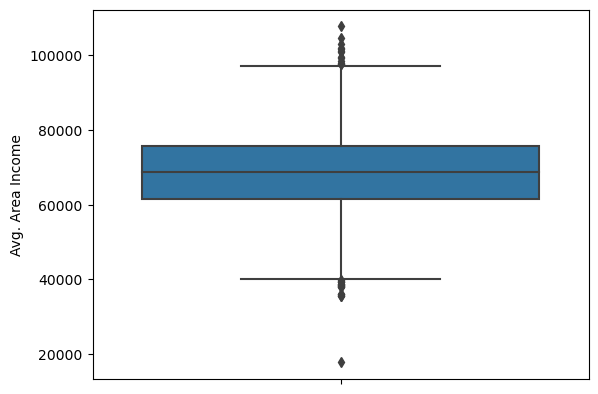

In [8]:
# check outlier and then we decide whether we have to use mean or median approach

sns.boxplot(y = "Avg. Area Income",data = df)

plt.show()

In [9]:
df['Avg. Area Income'] = df['Avg. Area Income'].fillna(df['Avg. Area Income'].median())

In [10]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       5
Avg. Area Number of Bedrooms    6
Area Population                 0
Price                           0
Address                         0
dtype: int64

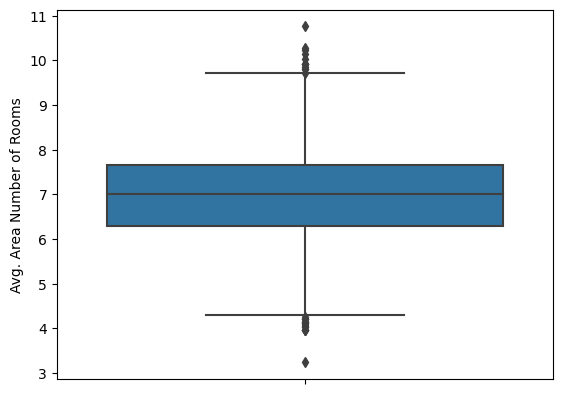

In [11]:
sns.boxplot(y = "Avg. Area Number of Rooms",data = df)

plt.show()

In [12]:
df['Avg. Area Number of Rooms'] = df['Avg. Area Number of Rooms'].fillna(df['Avg. Area Number of Rooms'].median())

In [13]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    6
Area Population                 0
Price                           0
Address                         0
dtype: int64

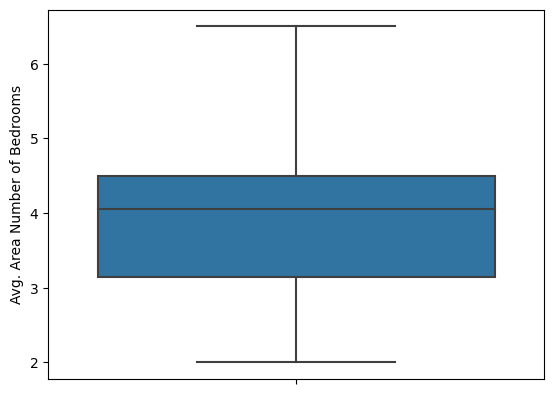

In [14]:
sns.boxplot(y = "Avg. Area Number of Bedrooms",data = df)

plt.show()

In [15]:
df['Avg. Area Number of Bedrooms'] = df['Avg. Area Number of Bedrooms'].fillna(df['Avg. Area Number of Bedrooms'].median())

In [16]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Part2 - Encoding part

In [17]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [18]:
df['Address'][0]

'208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

In [19]:
df['Address'][1]

'188 Johnson Views Suite 079\nLake Kathleen, CA 48958'

In [20]:
# Address is non significant variable to predict USA housing price, hence we have to drop this variable

new_df = df.iloc[:,0:-1]

In [21]:
new_df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


# part 3- Handling Outlier

### it's mandatory part whenever you solve regression problem



C:\Users\NADIR\AppData\Local\Temp\ipykernel_9440\3505040148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col])
C:\Users\NADIR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


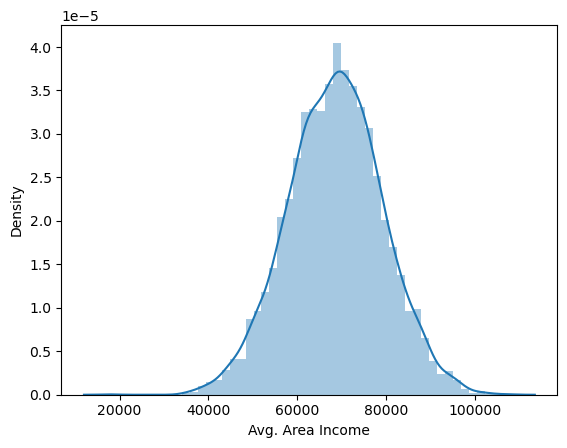

C:\Users\NADIR\AppData\Local\Temp\ipykernel_9440\3505040148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col])
C:\Users\NADIR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


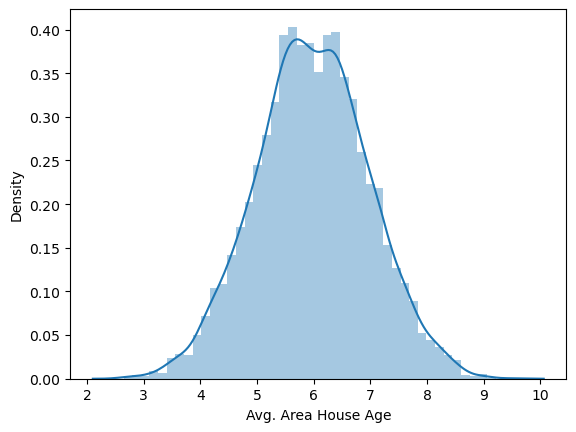

C:\Users\NADIR\AppData\Local\Temp\ipykernel_9440\3505040148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col])
C:\Users\NADIR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


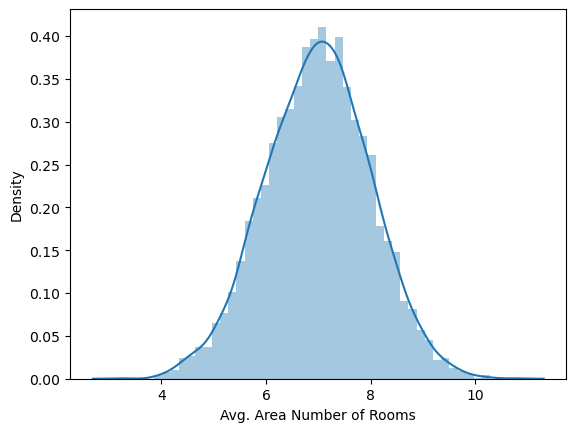

C:\Users\NADIR\AppData\Local\Temp\ipykernel_9440\3505040148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col])
C:\Users\NADIR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


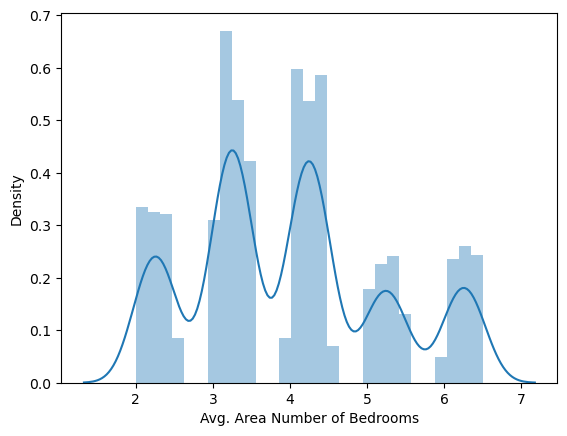

C:\Users\NADIR\AppData\Local\Temp\ipykernel_9440\3505040148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col])
C:\Users\NADIR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


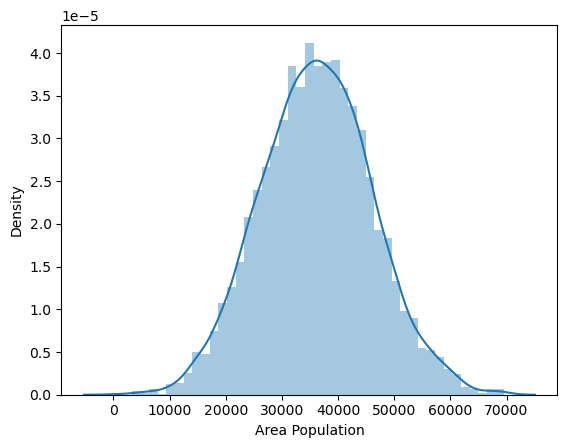

C:\Users\NADIR\AppData\Local\Temp\ipykernel_9440\3505040148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[col])
C:\Users\NADIR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


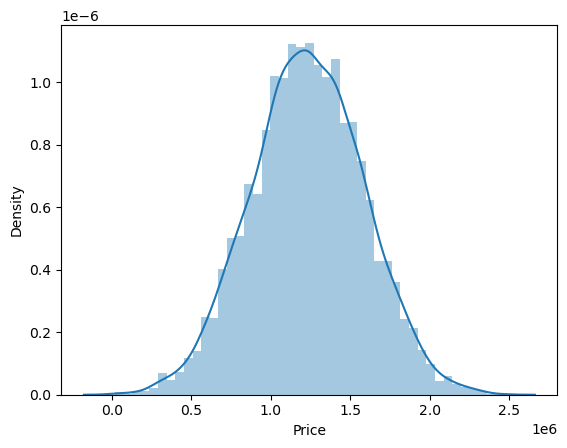

In [22]:
def distplots(col):
    sns.distplot(new_df[col])
    plt.show()
    
for i in list(new_df.columns)[0:]:
    distplots(i)

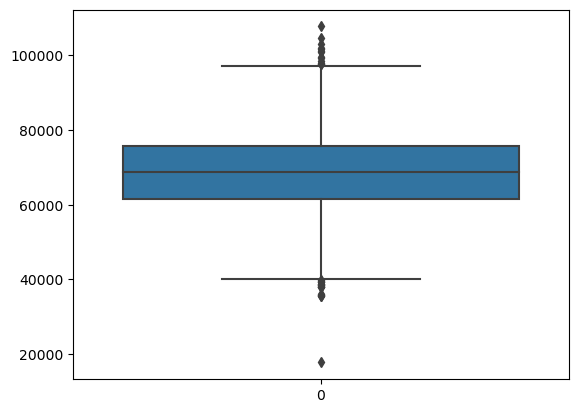

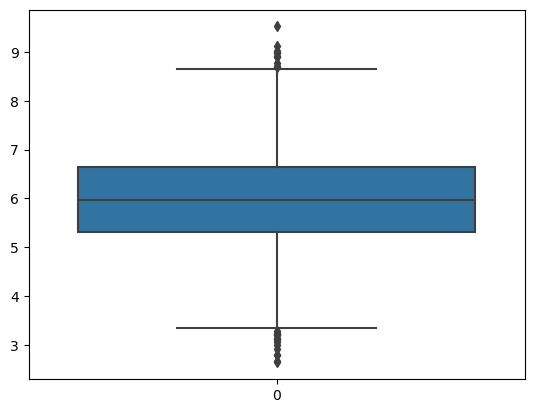

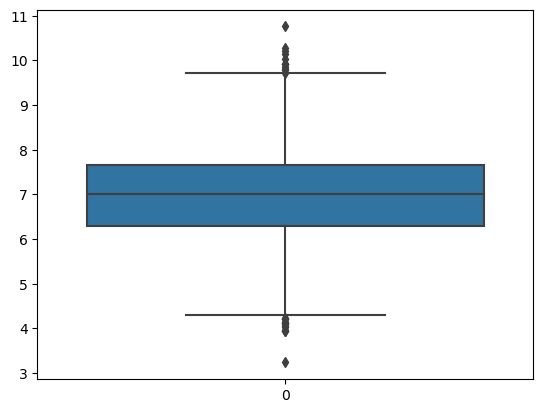

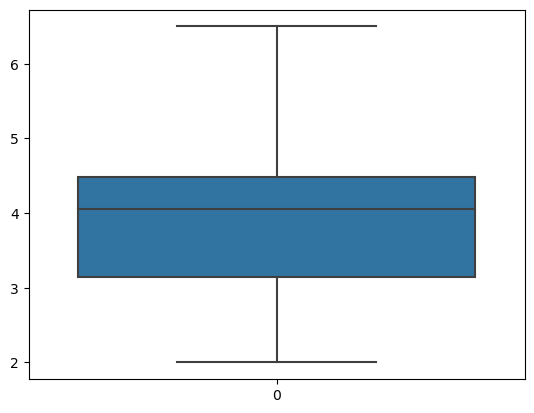

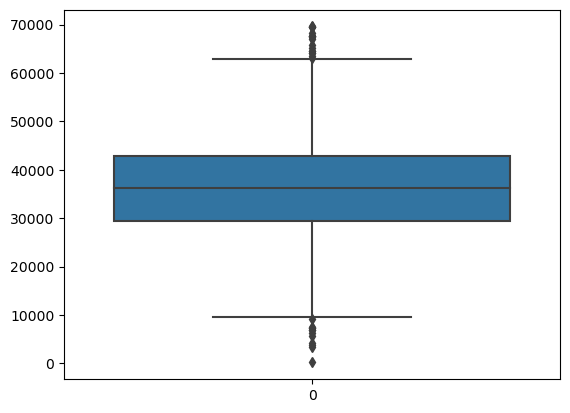

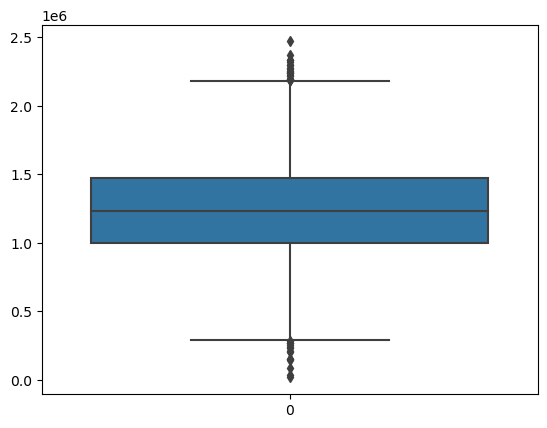

In [23]:
def boxplots(col):
    sns.boxplot(new_df[col])
    plt.show()
    
for i in list(new_df.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplots(i)

In [24]:
# please Capping method - one by one to handle the dataset

# Capping method


Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)

IQR = Q3 - Q1

pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 3.5 * IQR

In [25]:
print(Q1)
print("-------------"*5)

print(Q3)
print("-------------"*5)

print(IQR)
print("-------------"*5)

print(pos_outlier)
print("-------------"*5)

print(neg_outlier)
print("-------------"*5)

Avg. Area Income                 61485.150192
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299692
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928700
Price                           997577.135075
Name: 0.25, dtype: float64
-----------------------------------------------------------------
Avg. Area Income                7.576652e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665281e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
-----------------------------------------------------------------
Avg. Area Income                 14281.368910
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.365589
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362070
Price                           473633

In [26]:
df1 = new_df.copy()

df1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [27]:
df1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [28]:
# 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population'

In [29]:
income_q1 = df1['Avg. Area Income'].quantile(0.25)
income_q3 = df1['Avg. Area Income'].quantile(0.75)

income_iqr = income_q3 - income_q1

income_upper = income_q3 + 1.5 * income_iqr
income_lower = income_q1 - 1.5 * income_iqr

In [30]:
df1['Avg. Area Income']  = np.where(df1['Avg. Area Income'] > income_upper,income_upper,
                                   np.where(df1['Avg. Area Income'] < income_lower,income_lower,
                                           df1['Avg. Area Income']))

In [31]:
age_q1 = df1['Avg. Area House Age'].quantile(0.25)
age_q3 = df1['Avg. Area House Age'].quantile(0.75)
age_iqr = age_q3 - age_q1
age_upper = age_q3 + 1.5 * age_iqr
age_lower = age_q1 - 1.5 * age_iqr

In [32]:
df1['Avg. Area House Age'] = np.where(df1['Avg. Area House Age'] > age_upper,age_upper,
                                     np.where(df1['Avg. Area House Age'] < age_lower, age_lower,
                                            df1['Avg. Area House Age']) )

In [33]:
room_q1 = df1['Avg. Area Number of Rooms'].quantile(0.25)
room_q3 = df1['Avg. Area Number of Rooms'].quantile(0.75)
room_iqr = room_q3 - room_q1
room_upper = room_q3 + 1.5 * room_iqr
room_lower = room_q1 - 1.5 * room_iqr

In [34]:
df1['Avg. Area Number of Rooms'] = np.where(df1['Avg. Area Number of Rooms'] > room_upper,room_upper,
                                     np.where(df1['Avg. Area Number of Rooms'] < room_lower, room_lower,
                                            df1['Avg. Area Number of Rooms']) )

In [35]:
pop_q1 = df1['Area Population'].quantile(0.25)
pop_q3 = df1['Area Population'].quantile(0.75)
pop_iqr = pop_q3 - pop_q1
pop_upper = pop_q3 + 1.5 * pop_iqr
pop_lower = pop_q1 - 1.5 * pop_iqr

In [36]:
df1['Area Population'] = np.where(df1['Area Population'] > pop_upper,pop_upper,
                                     np.where(df1['Area Population'] < pop_lower, pop_lower,
                                            df1['Area Population']) )

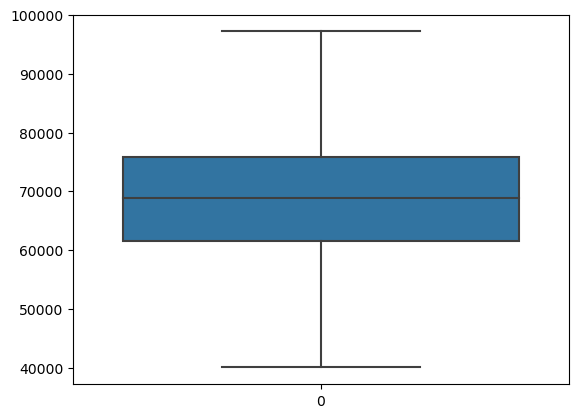

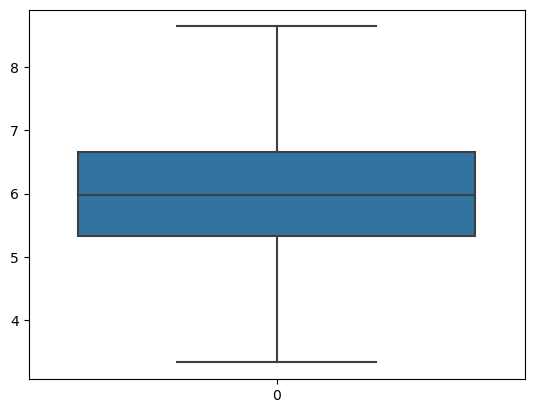

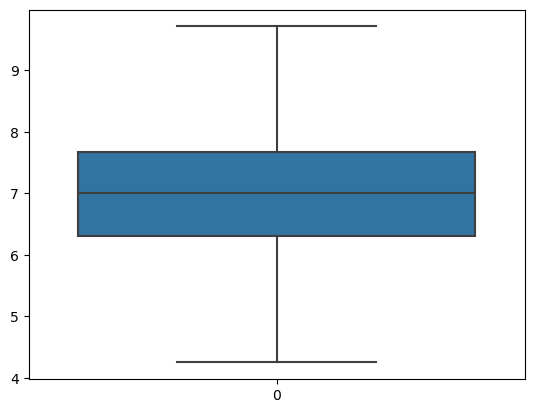

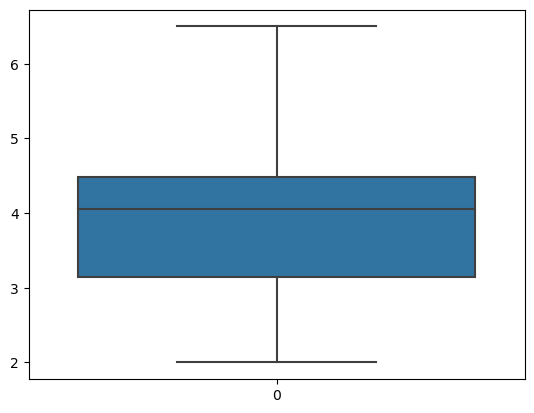

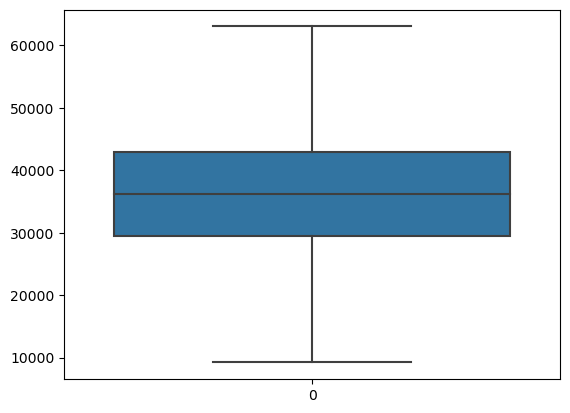

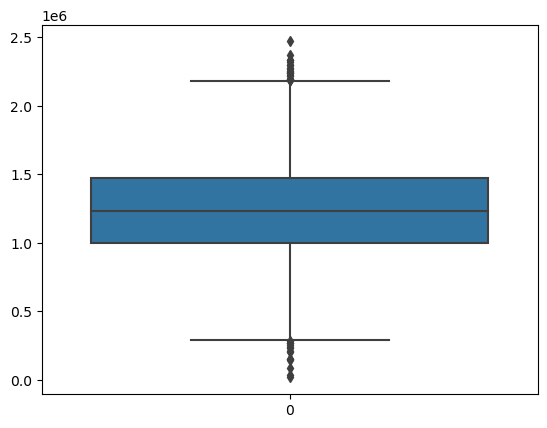

In [37]:
def boxplots(col):
    sns.boxplot(df1[col])
    plt.show()
    
for i in list(df1.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplots(i)

In [38]:
df1

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [39]:
# part 4 Feature Scaling

# we can use omly do with  independent variable
# please note, feature scaling is not use for dependent variable

# split the data into independent and dependent variable

x = df1.iloc[:,0:-1]
y = df1['Price']

In [40]:
print(x)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09      23086.80050  
1  

In [41]:
print(y)

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64


In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc_x = sc.fit_transform(x)

pd.DataFrame(sc_x)

,0,1,2,3,4
0,1.036382,-0.298541,0.021620,0.087582,-1.325622
1,1.008309,0.025747,-0.256381,-0.723031,0.407049
2,-0.690457,-0.113082,1.523179,0.930619,0.073326
3,-0.495800,1.226822,-1.398967,-0.585227,-0.187484
4,-0.813869,-0.949376,0.850726,0.201068,-0.994293
...,...,...,...,...,...
4995,-0.758470,1.877474,-0.849064,-0.423104,-1.350917
4996,0.936679,1.035210,-0.410236,0.030839,-1.069131
4997,-0.491501,1.290004,-2.179585,-1.501219,-0.293363
4998,-0.055437,-0.448985,0.142416,1.181909,0.655755


<Axes: >

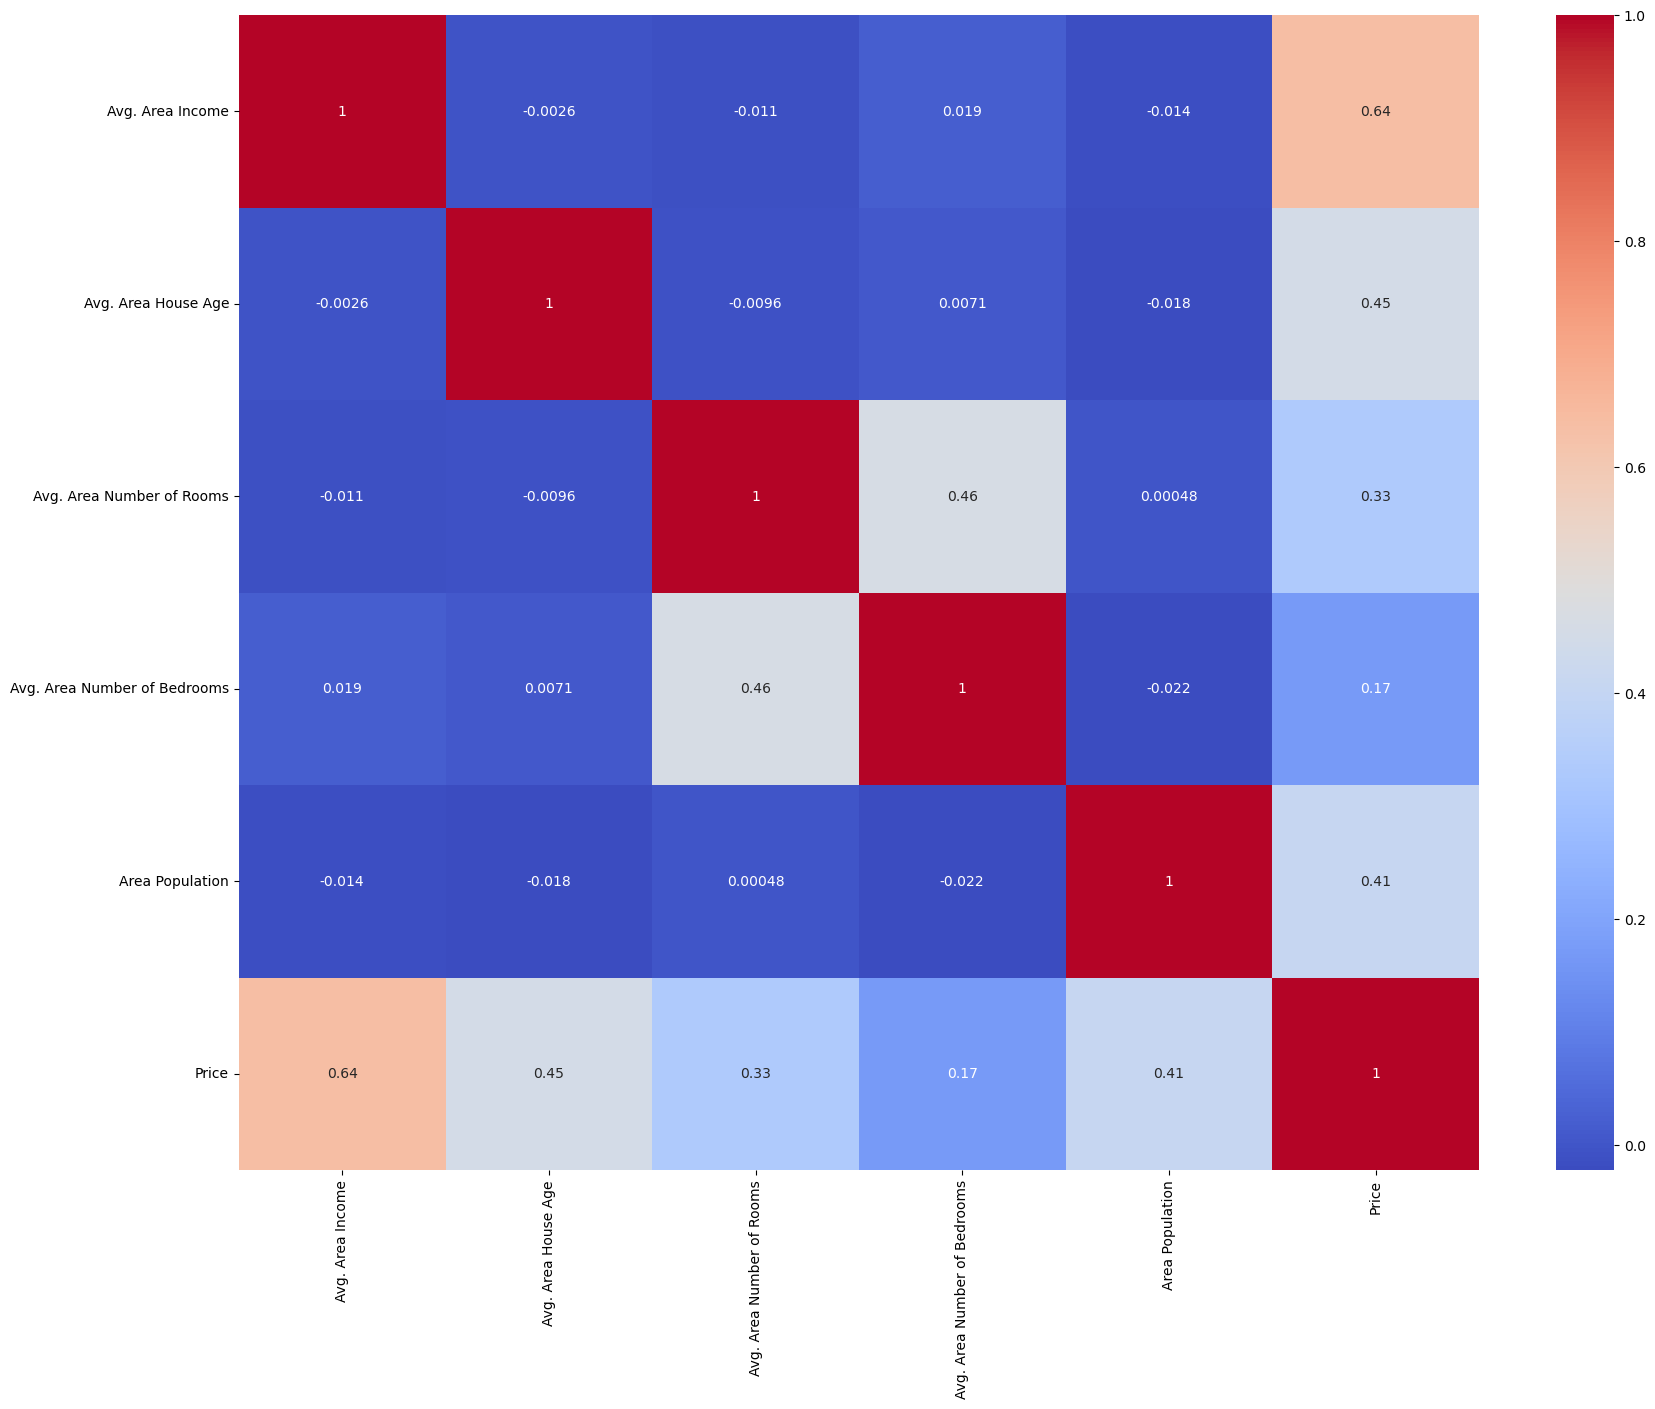

In [43]:
# Finding the correlation

plt.figure(figsize = (20,15))

corr = df1.corr()
sns.heatmap(corr, annot = True,cmap = 'coolwarm')

# VIF - Variance Inflation Factor - to check multicollinearity

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variable = sc_x

vif = pd.DataFrame()

vif['Variance Inflation Variavle'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns

In [45]:
vif

,Variance Inflation Variavle,Features
0,1.001067,Avg. Area Income
1,1.000593,Avg. Area House Age
2,1.274864,Avg. Area Number of Rooms
3,1.275727,Avg. Area Number of Bedrooms
4,1.001144,Area Population


# Split the data into training and testing for building the model for prediction

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 101)


In [47]:
print(x_train.shape)

(3750, 5)


In [48]:
print(x_test.shape)

(1250, 5)


In [49]:
print(y_test.shape)

(1250,)


In [50]:
print(y_train.shape)

(3750,)


# Building Linear Regression Model

## Approach no - 1

In [51]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
print("lr.intercept_: ",lr.intercept_)

print()

print("lr.coef_: ",lr.coef_)

lr.intercept_:  -2657921.446406655

lr.coef_:  [2.17329557e+01 1.65690136e+05 1.21587070e+05 1.72620828e+03
 1.53020327e+01]


In [53]:
x.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [54]:
# predict house price by using in model  with test dataset

y_pred_price = lr.predict(x_test)

y_pred_price_train = lr.predict(x_train)

In [55]:
y_pred_price

array([1258771.5463026 ,  821509.83414788, 1743523.44944726, ...,
       1117250.31198157,  718622.68490107, 1518227.07294718])

In [56]:
# Validate the actual price of the test data and predicted price

from sklearn.metrics import r2_score

r2_score(y_test,y_pred_price)

0.9136249997379425

In [57]:
r2_score(y_train,y_pred_price_train)

0.9165094280297815

# Approach no -2 OLS Method

In [58]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [59]:
reg_model = smf.OLS(endog = y_train, exog = x_train).fit()

In [60]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          2.011e+04
Date:                Fri, 16 Aug 2024   Prob (F-statistic):                        0.00
Time:                        10:29:14   Log-Likelihood:                         -51812.
No. Observations:                3750   AIC:                                  1.036e+05
Df Residuals:                    3745   BIC:                                  1.037e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2091      0.314     32.560      0.000       9.594      10.824
Avg. Area House Age           4.916e+04   3478.628     14.131      0.000    4.23e+04     5.6e+04
Avg. Area Number of Rooms     -1.09e+04   3801.792     -2.868      0.004   -1.84e+04   -3448.582
Avg. Area Number of Bedrooms  5109.5344   3631.219      1.407      0.159   -2009.825    1.22e+04
Area Population                  8.5764      0.382     22.429      0.000       7.827       9.326
==============================================================================
Omnibus:                        0.212   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.899   Jarque-Bera (JB):                0.258
Skew:                          -0.000   Prob(JB):                        0.879
Kurtosis:                       2.959   Cond. No.                     9.32e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
# There is no autocorrelation in linear Regression model
# what to do when the assumtions (autocorrelation) fails?
## 1) lagged Variable - 
## 2) Difference -
## 3) Generalised least squares -
## 4) Time Series Models - AR, MA,ARMA, ARIMA,STL
## 5) Robust standard Error - HAC 

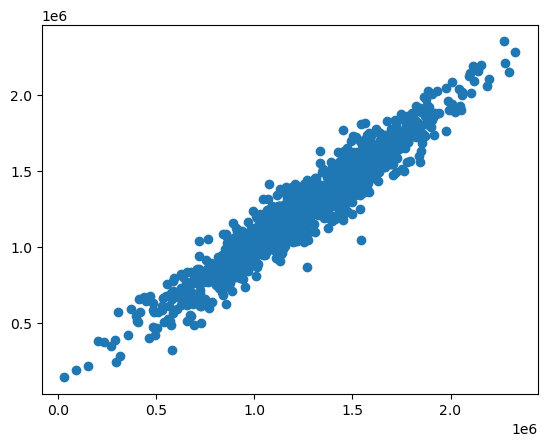

In [62]:
# CHECK LINEARITY

plt.scatter(y_test, y_pred_price)

C:\Users\NADIR\AppData\Local\Temp\ipykernel_9440\3808660148.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred_price),bins = 50)
C:\Users\NADIR\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


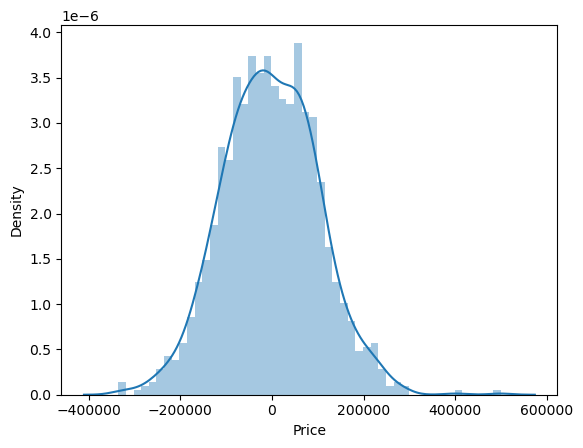

In [63]:
# Normality of Residual

sns.distplot((y_test-y_pred_price),bins = 50)
plt.show()

In [64]:
# Conclude this Model
# Data Preprocessing -
# EDA
# Split the data into train and test


### Adj. R-Square(uncentered): 0.964
### All variable is statistically significant(p<= 0.05)
### task - please drop "Avg. Area Number of Bedrooms" and then follow thw same approach
### check underfitting or overfitting problem - no bias and variance found
## Assumtions

# 1) Linearity - Satisfied
# 2) NOrmality of Residuals - Satisfied
# 3) Homoscedasticity - Satisfied(there is no outlier and residual is normally distributed)
# 4) No Autocorrelation - Satisfied
# 5) No or little Multicollinearity - Satisfied
# 6) No endogenity problem - Satisfied

In [65]:
# Regularization
# Gradient Descent

# By using sklearn linear model

# Training accuracy : 91.6%
# test accuracy: 91.3%

# Lasso Regularization

In [66]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)
print("Lasso Model: ",(lasso.coef_))

Lasso Model:  [2.17329556e+01 1.65690031e+05 1.21586986e+05 1.72617492e+03
 1.53020326e+01]


In [67]:
y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

In [70]:
print("Training Accuracy: ",r2_score(y_train,y_pred_train_lasso))
print()
print("test Accuracy: ",r2_score(y_test,y_pred_test_lasso))

Training Accuracy:  0.9165094280296036

test Accuracy:  0.9136249987893023


In [71]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.3)
ridge.fit(x_train, y_train)
print("ridge Model: ",(ridge.coef_))

ridge Model:  [2.17329254e+01 1.65675916e+05 1.21574274e+05 1.73113927e+03
 1.53020563e+01]


In [73]:
y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

In [74]:
print("Training Accuracy: ",r2_score(y_train,y_pred_train_ridge))
print()
print("test Accuracy: ",r2_score(y_test,y_pred_test_ridge))

Training Accuracy:  0.9165094255220702

test Accuracy:  0.9136246738265379


# ElasticNet

In [75]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha = 0.3,l1_ratio = 0.1)
elastic.fit(x_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [76]:
y_pred_train_elastic = elastic.predict(x_train)
y_pred_test_elastic = elastic.predict(x_test)

In [78]:
print("Training Accuracy: ",r2_score(y_train,y_pred_train_elastic))
print()
print("test Accuracy: ",r2_score(y_test,y_pred_test_elastic))

Training Accuracy:  0.9003399308017156

test Accuracy:  0.8948439417116103
